In [4]:
import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [5]:
with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

print(len(code_data))

424


In [6]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [7]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [5]:
dong_name = input("핫플레이스가 위치한 행정동을 입력하세요 -->")
for row in code_data:
  if row[-1] == dong_name:
    dong_code = row[1]

print(dong_name, '-', dong_code, '을(를)분석합니다!')

압구정동 - 11680545 을(를)분석합니다!


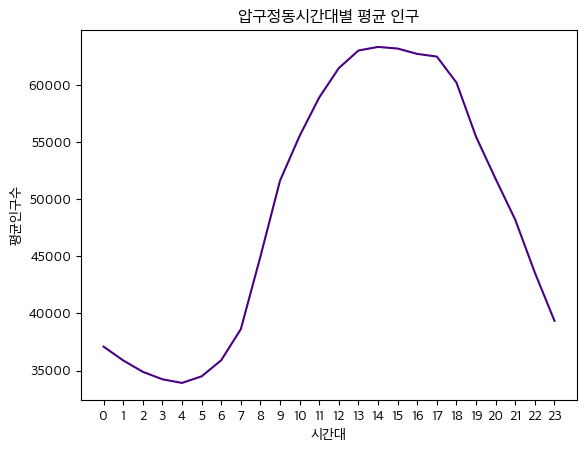

In [6]:
import matplotlib.pyplot as plt

population = [0 for i in range(24)]
for row in data:
  if row[2] == dong_code:
    time, p = row[1], row[3]
    population[time] += p

population = [p/31 for p in population]

plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + '시간대별 평균 인구')
plt.plot(range(24), population, color='indigo')
plt.xticks(range(24), range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

In [7]:
import datetime

datetime.date(2019, 12, 15).weekday()

6

In [8]:
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
  if row[2] == dong_code:
    time, p = row[1], row[3]
    year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
    num = datetime.date(year, mon, day).weekday()
    if num < 5:
      weekday[time] += p
    else:
      weekend[time] += p

In [9]:
# 2019년 12월의 주중/주말 일수 구하기
weekday_cnt, weekend_cnt = 0, 0
for i in range(1, 32):
  if datetime.date(2019, 12, i).weekday() < 5:
    weekday_cnt += 1
  else:
    weekend_cnt += 1

print('2019년 12월의 주중 일수 =', weekday_cnt, '주말 일수 =', weekend_cnt)

weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

print('주중 인구:', weekday)
print('주말 인구:', weekend)

2019년 12월의 주중 일수 = 22 주말 일수 = 9
주중 인구: [36348.0879, 35284.529854545464, 34498.768759090904, 34028.96384545454, 33899.33714545454, 34599.74798636365, 36262.84079090908, 39520.43202272727, 47412.64013636365, 54707.293981818184, 58675.10905, 61947.59178181819, 64325.155981818185, 65856.20964545454, 66227.48544545454, 66413.45866818182, 66251.15107727272, 66640.75652727274, 64521.26677272727, 58771.3062409091, 54535.62893636364, 50508.405322727274, 45000.37916363635, 40292.146422727266]
주말 인구: [38933.31007777777, 37376.29128888888, 35857.52363333333, 34752.6713, 33971.79182222223, 34237.23188888889, 35032.00224444444, 36442.80891111111, 39032.354877777776, 44120.33687777778, 47925.02798888888, 51506.637777777774, 54567.81698888889, 56124.18155555555, 56298.54536666667, 55353.43318888889, 54134.06342222222, 52379.621722222226, 49707.45673333333, 47417.98314444444, 45043.66387777778, 42578.63195555555, 40075.01161111111, 37075.203344444446]


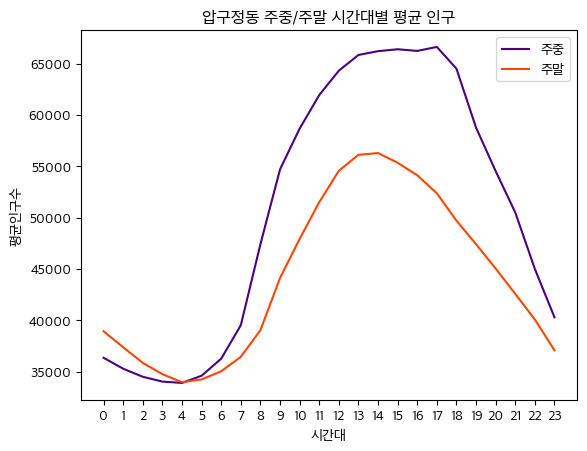

In [10]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구')
plt.plot(range(24), weekday, color='indigo', label='주중')
plt.plot(range(24), weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()

In [11]:
male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
  if row[2] == dong_code:
    time = row[1]
    male[time] += sum(row[4:18])      # 남성 인구 총합 구하기
    female[time] += sum(row[18:32])   # 여성 인구 총합 구하기
male = [m/31 for m in male]
female = [f/31 for f in female]

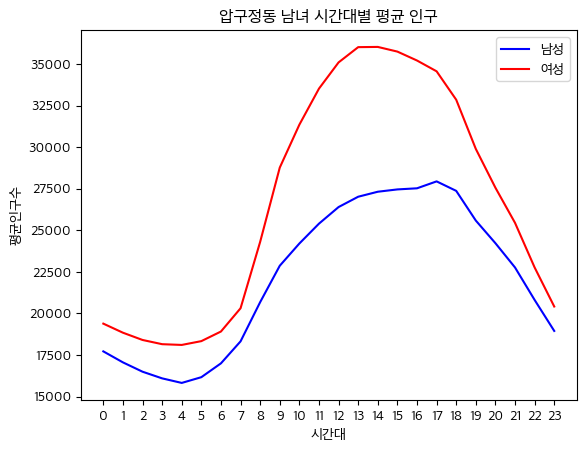

In [12]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + ' 남녀 시간대별 평균 인구')
plt.plot(range(24), male, color='b', label='남성')
plt.plot(range(24), female, color='r', label='여성')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.xticks(range(24), range(24))
plt.show()

In [13]:
# 핫플레이스가 있는 행정동
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 --> ')
for row in code_data:
  if row[-1] == dong_name:
    dong_code = row[1]

# 비교할 행정동
dong_name2 = input('비교할 행정동을 입력하세요 --> ')
for row in code_data:
  if row[-1] == dong_name2:
    dong_code2 = row[1]

In [14]:
population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data:
  # 핫플레이스가 있는 행정동인 경우
  if row[2] == dong_code:
    time, p = row[1], row[3]
    population[time] += p

  # 비교할 지역의 행정동인 경우
  elif row[2] == dong_code2:
    time, p = row[1], row[3]
    population2[time] += p

population = [p/31 for p in population]
population2 = [p/31 for p in population2]

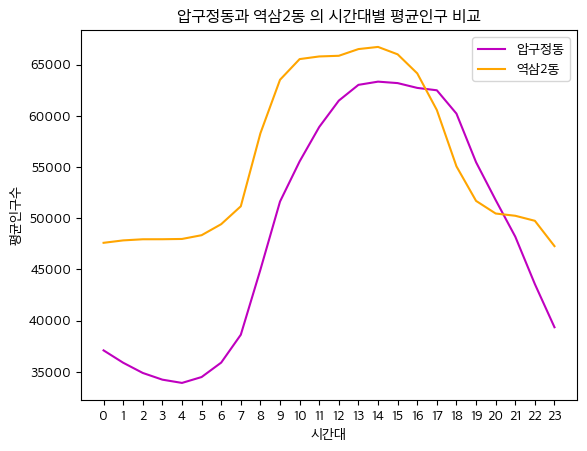

In [15]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + '과 '+dong_name2+' 의 시간대별 평균인구 비교')
plt.plot(range(24), population, color='m', label=dong_name)
plt.plot(range(24), population2, color='orange', label=dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()

In [36]:
import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [37]:
with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

print(len(code_data))

424


In [38]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [39]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [13]:
# 핫플레이스가 있는 행정동
cnt = int(input("비교할 행정동의 개수를 입력하새요 : "))
dong_name = []
dong_code = []

for _ in range(cnt):
  dong_name.append(input('핫플레이스가 위치한 행정동을 입력하세요 : '))

for i in range(cnt):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

In [ ]:
# 핫플레이스가 있는 행정동
cnt = int(input("비교할 행정동의 개수를 입력하새요 : "))
dong_name = []
dong_code = []

for _ in range(cnt):
  dong_name.append(input('핫플레이스가 위치한 행정동을 입력하세요 : '))

for i in range(cnt):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations 리스트 초기화 수정 (중요!)
populations = [[0 for i in range(24)] for _ in range(cnt)]

for row in data:
  # 핫플레이스가 있는 행정동인 경우
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # 시간을 정수로 변환
    p = int(row[3])  # 인구를 정수로 변환
    populations[dong_idx][time] += p

# 31일로 나누어 평균 계산
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)

[[37097.967741935485, 35891.3870967742, 34892.74193548387, 34238.58064516129, 33919.87096774193, 34494.032258064515, 35905.0, 38626.41935483871, 44979.1935483871, 51633.12903225807, 55553.6129032258, 58915.87096774193, 61491.87096774193, 63030.290322580644, 63344.41935483871, 63202.0, 62732.83870967742, 62499.903225806454, 60219.967741935485, 55474.645161290326, 51779.32258064516, 48205.67741935484, 43569.87096774193, 39357.77419354839], [30727.16129032258, 30485.290322580644, 30155.90322580645, 29643.677419354837, 29298.967741935485, 29418.0, 30867.0, 33869.48387096774, 35454.903225806454, 37637.032258064515, 39011.93548387097, 39982.41935483871, 40374.16129032258, 41956.16129032258, 42527.903225806454, 42584.77419354839, 42753.8064516129, 42151.290322580644, 41864.290322580644, 40614.51612903226, 39345.74193548387, 37916.77419354839, 34887.45161290323, 31264.1935483871]]


[[37097.967741935485, 35891.3870967742, 34892.74193548387, 34238.58064516129, 33919.87096774193, 34494.032258064515, 35905.0, 38626.41935483871, 44979.1935483871, 51633.12903225807, 55553.6129032258, 58915.87096774193, 61491.87096774193, 63030.290322580644, 63344.41935483871, 63202.0, 62732.83870967742, 62499.903225806454, 60219.967741935485, 55474.645161290326, 51779.32258064516, 48205.67741935484, 43569.87096774193, 39357.77419354839], [47603.45161290323, 47839.58064516129, 47949.32258064516, 47953.0, 47980.096774193546, 48346.48387096774, 49424.967741935485, 51171.22580645161, 58301.032258064515, 63526.67741935484, 65546.32258064517, 65804.83870967742, 65869.54838709677, 66524.45161290323, 66735.2258064516, 66011.80645161291, 64152.032258064515, 60569.41935483871, 55070.48387096774, 51697.77419354839, 50464.93548387097, 50244.45161290323, 49752.77419354839, 47279.3870967742]]


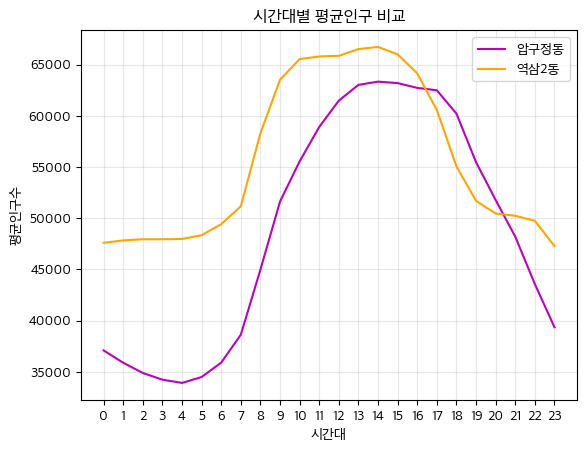

In [10]:
import matplotlib.pyplot as plt

# 핫플레이스가 있는 행정동
cnt = int(input("비교할 행정동의 개수를 입력하새요 : "))
dong_name = []
dong_code = []

for _ in range(cnt):
  dong_name.append(input('핫플레이스가 위치한 행정동을 입력하세요 : '))

for i in range(cnt):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations 리스트 초기화 수정 (중요!)
populations = [[0 for i in range(24)] for _ in range(cnt)]

for row in data:
  # 핫플레이스가 있는 행정동인 경우
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # 시간을 정수로 변환
    p = int(row[3])  # 인구를 정수로 변환
    populations[dong_idx][time] += p

# 31일로 나누어 평균 계산
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)

plt.rc('font', family='Apple SD Gothic Neo')
plt.title('시간대별 평균인구 비교')

# 여러 행정동을 동적으로 그래프에 추가
colors = ['m', 'orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink']
for i in range(cnt):
  plt.plot(range(24), populations[i], color=colors[i %
           len(colors)], label=dong_name[i])

plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.grid(True, alpha=0.3)  # 그리드 추가 (선택사항)
plt.show()

In [29]:
# 핫플레이스가 있는 행정동
dong_name = list(input("비교할 행정동을 공백문자로 구분하여 입력하새요 : ").split())
dong_code = []

for i in range(len(dong_name)):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

In [ ]:
# 핫플레이스가 있는 행정동
dong_name = list(input("비교할 행정동을 공백문자로 구분하여 입력하새요 : ").split())
dong_code = []

for i in range(len(dong_name)):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations 리스트 초기화 수정 (중요!)
populations = [[0 for i in range(24)] for _ in range(len(dong_name))]

for row in data:
  # 핫플레이스가 있는 행정동인 경우
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # 시간을 정수로 변환
    p = int(row[3])  # 인구를 정수로 변환
    populations[dong_idx][time] += p

# 31일로 나누어 평균 계산
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)

NameError: name 'dong_name' is not defined

[[37097.967741935485, 35891.3870967742, 34892.74193548387, 34238.58064516129, 33919.87096774193, 34494.032258064515, 35905.0, 38626.41935483871, 44979.1935483871, 51633.12903225807, 55553.6129032258, 58915.87096774193, 61491.87096774193, 63030.290322580644, 63344.41935483871, 63202.0, 62732.83870967742, 62499.903225806454, 60219.967741935485, 55474.645161290326, 51779.32258064516, 48205.67741935484, 43569.87096774193, 39357.77419354839], [73943.41935483871, 71203.64516129032, 69386.16129032258, 68416.96774193548, 67901.35483870968, 68171.87096774194, 71209.19354838709, 80586.58064516129, 102767.64516129032, 127389.35483870968, 140544.2258064516, 150267.48387096773, 157289.38709677418, 161293.1935483871, 162429.51612903227, 160459.74193548388, 156438.7741935484, 150152.16129032258, 138507.38709677418, 128039.6129032258, 117964.45161290323, 104861.87096774194, 89687.3870967742, 78661.93548387097], [47603.45161290323, 47839.58064516129, 47949.32258064516, 47953.0, 47980.096774193546, 4834

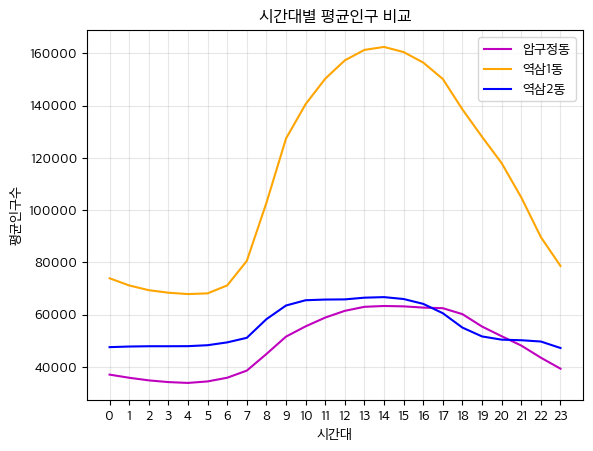

In [6]:
# 핫플레이스가 있는 행정동
import matplotlib.pyplot as plt
dong_name = list(input("비교할 행정동을 공백문자로 구분하여 입력하세요 : ").split())
dong_code = []

for i in range(len(dong_name)):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations 리스트 초기화 수정 (중요!)
populations = [[0 for i in range(24)] for _ in range(len(dong_name))]

for row in data:
  # 핫플레이스가 있는 행정동인 경우
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # 시간을 정수로 변환
    p = int(row[3])  # 인구를 정수로 변환
    populations[dong_idx][time] += p

# 31일로 나누어 평균 계산
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)


plt.rc('font', family='Apple SD Gothic Neo')
plt.title('시간대별 평균인구 비교')

# 여러 행정동을 동적으로 그래프에 추가
colors = ['m', 'orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink']
for i in range(len(dong_name)):
  plt.plot(range(24), populations[i], color=colors[i %
           len(colors)], label=dong_name[i])

plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.grid(True, alpha=0.3)  # 그리드 추가 (선택사항)
plt.show()

In [1]:
import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [2]:
with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

print(len(code_data))

424


In [3]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [4]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [7]:
import sys
from PyQt5.QtWidgets import (QApplication, QMainWindow, QWidget, QVBoxLayout,
                             QHBoxLayout, QLabel, QLineEdit, QPushButton,
                             QTextEdit, QMessageBox, QGroupBox, QSplitter)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QFont
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

for row in code_data:
  row[1] = int(row[1])


class MplCanvas(FigureCanvas):
  def __init__(self, parent=None, width=5, height=4, dpi=100):
    self.fig = Figure(figsize=(width, height), dpi=dpi)
    self.axes = self.fig.add_subplot(111)
    super(MplCanvas, self).__init__(self.fig)


class PopulationAnalysisApp(QMainWindow):
  def __init__(self):
    super().__init__()
    self.canvas = None
    self.init_ui()

  def init_ui(self):
    # 윈도우 설정
    self.setWindowTitle('행정동 인구 비교 분석')
    self.setGeometry(100, 100, 1200, 700)

    # 중앙 위젯 설정
    central_widget = QWidget()
    self.setCentralWidget(central_widget)

    # 메인 레이아웃
    main_layout = QVBoxLayout()
    main_layout.setSpacing(15)
    main_layout.setContentsMargins(20, 20, 20, 20)

    # 제목
    title_label = QLabel('시간대별 평균인구 비교 분석')
    title_font = QFont('Arial', 18, QFont.Bold)
    title_label.setFont(title_font)
    title_label.setAlignment(Qt.AlignCenter)
    title_label.setStyleSheet("color: #2c3e50; margin: 10px 0;")
    main_layout.addWidget(title_label)

    # 입력 그룹박스
    input_group = QGroupBox("행정동 입력")
    input_group.setStyleSheet("""
            QGroupBox {
                font-size: 13px;
                font-weight: bold;
                color: #2c3e50;
                border: 2px solid #3498db;
                border-radius: 5px;
                margin-top: 10px;
                padding-top: 10px;
            }
            QGroupBox::title {
                subcontrol-origin: margin;
                left: 10px;
                padding: 0 5px 0 5px;
            }
        """)
    input_layout = QVBoxLayout()

    # 안내 레이블
    instruction_label = QLabel('비교할 행정동을 공백문자로 구분하여 입력하세요:')
    instruction_label.setStyleSheet(
        "color: #34495e; font-size: 11px; border: none;")
    input_layout.addWidget(instruction_label)

    # 입력 필드
    self.entry = QLineEdit()
    self.entry.setPlaceholderText("예: 강남구 서초구 송파구")
    self.entry.setFont(QFont('Arial', 12))
    self.entry.setStyleSheet("""
            QLineEdit {
                padding: 10px;
                border: 2px solid #bdc3c7;
                border-radius: 5px;
                background-color: white;
                color: #000000;
            }
            QLineEdit:focus {
                border: 2px solid #3498db;
            }
        """)
    self.entry.returnPressed.connect(self.analyze_and_plot)
    input_layout.addWidget(self.entry)

    # 버튼 레이아웃
    button_layout = QHBoxLayout()

    # 분석 버튼
    self.analyze_button = QPushButton('분석 및 그래프 보기')
    self.analyze_button.setFont(QFont('Arial', 11, QFont.Bold))
    self.analyze_button.setStyleSheet("""
            QPushButton {
                background-color: #27ae60;
                color: white;
                padding: 12px 24px;
                border: none;
                border-radius: 5px;
                font-size: 12px;
            }
            QPushButton:hover {
                background-color: #229954;
            }
            QPushButton:pressed {
                background-color: #1e8449;
            }
        """)
    self.analyze_button.clicked.connect(self.analyze_and_plot)
    button_layout.addWidget(self.analyze_button)

    # 초기화 버튼
    self.clear_button = QPushButton('초기화')
    self.clear_button.setFont(QFont('Arial', 11))
    self.clear_button.setStyleSheet("""
            QPushButton {
                background-color: #e74c3c;
                color: white;
                padding: 12px 24px;
                border: none;
                border-radius: 5px;
                font-size: 12px;
            }
            QPushButton:hover {
                background-color: #c0392b;
            }
            QPushButton:pressed {
                background-color: #a93226;
            }
        """)
    self.clear_button.clicked.connect(self.clear_input)
    button_layout.addWidget(self.clear_button)

    button_layout.addStretch()
    input_layout.addLayout(button_layout)

    input_group.setLayout(input_layout)
    main_layout.addWidget(input_group)

    # 스플리터로 결과와 그래프 영역 분할
    splitter = QSplitter(Qt.Horizontal)

    # 결과 그룹박스 (왼쪽)
    result_group = QGroupBox("분석 결과")
    result_group.setStyleSheet("""
            QGroupBox {
                font-size: 13px;
                font-weight: bold;
                color: #2c3e50;
                border: 2px solid #9b59b6;
                border-radius: 5px;
                margin-top: 10px;
                padding-top: 10px;
            }
            QGroupBox::title {
                subcontrol-origin: margin;
                left: 10px;
                padding: 0 5px 0 5px;
            }
        """)
    result_layout = QVBoxLayout()

    # 결과 텍스트 영역
    self.result_text = QTextEdit()
    self.result_text.setReadOnly(True)
    self.result_text.setFont(QFont('Courier', 10))
    self.result_text.setStyleSheet("""
            QTextEdit {
                background-color: #ffffff;
                color: #000000;
                border: 1px solid #dee2e6;
                border-radius: 5px;
                padding: 10px;
            }
        """)
    result_layout.addWidget(self.result_text)
    result_group.setLayout(result_layout)

    # 그래프 그룹박스 (오른쪽)
    graph_group = QGroupBox("그래프")
    graph_group.setStyleSheet("""
            QGroupBox {
                font-size: 13px;
                font-weight: bold;
                color: #2c3e50;
                border: 2px solid #e67e22;
                border-radius: 5px;
                margin-top: 10px;
                padding-top: 10px;
            }
            QGroupBox::title {
                subcontrol-origin: margin;
                left: 10px;
                padding: 0 5px 0 5px;
            }
        """)
    self.graph_layout = QVBoxLayout()

    # 초기 안내 메시지
    self.placeholder_label = QLabel("분석을 실행하면 여기에 그래프가 표시됩니다.")
    self.placeholder_label.setAlignment(Qt.AlignCenter)
    self.placeholder_label.setStyleSheet(
        "color: #95a5a6; font-size: 14px; border: none;")
    self.graph_layout.addWidget(self.placeholder_label)

    graph_group.setLayout(self.graph_layout)

    # 스플리터에 위젯 추가
    splitter.addWidget(result_group)
    splitter.addWidget(graph_group)
    splitter.setSizes([400, 700])  # 초기 크기 비율

    main_layout.addWidget(splitter)

    # 하단 안내 메시지
    hint_label = QLabel('💡 Tip: 입력 후 Enter 키를 눌러도 분석이 실행됩니다')
    hint_label.setStyleSheet(
        "color: #7f8c8d; font-size: 10px; font-style: italic;")
    hint_label.setAlignment(Qt.AlignCenter)
    main_layout.addWidget(hint_label)

    central_widget.setLayout(main_layout)

    # 윈도우 스타일
    self.setStyleSheet("""
            QMainWindow {
                background-color: #ecf0f1;
            }
        """)

  def analyze_and_plot(self):
    # 입력값 가져오기
    input_text = self.entry.text().strip()

    if not input_text:
      QMessageBox.warning(self, "입력 오류", "행정동 이름을 입력해주세요!")
      return

    # 행정동 이름 파싱
    dong_name = input_text.split()

    # code_data와 data가 비어있는지 확인
    if not code_data or not data:
      QMessageBox.critical(self, "데이터 오류",
                           "데이터가 로드되지 않았습니다.\n"
                           "code_data와 data 변수를 먼저 로드해주세요!")
      return

    # 행정동 코드 찾기
    dong_code = []
    for i in range(len(dong_name)):
      found = False
      for row in code_data:
        if row[-1] == dong_name[i]:
          dong_code.append(int(row[1]))
          found = True
          break
      if not found:
        QMessageBox.critical(self, "오류",
                             f"'{dong_name[i]}'을(를) 찾을 수 없습니다!")
        return

    # populations 리스트 초기화
    populations = [[0 for i in range(24)] for _ in range(len(dong_name))]

    # 데이터 집계
    for row in data:
      # 핫플레이스가 있는 행정동인 경우
      if row[2] in dong_code:
        dong_idx = dong_code.index(row[2])
        time = int(row[1])  # 시간을 정수로 변환
        p = int(row[3])  # 인구를 정수로 변환
        populations[dong_idx][time] += p

    # 31일로 나누어 평균 계산
    for i in range(len(populations)):
      populations[i] = [p/31 for p in populations[i]]

    # 결과 출력 영역에 표시
    self.result_text.clear()
    result_html = "<h3 style='color: #2c3e50;'>시간대별 평균 인구 데이터</h3>"
    result_html += "<hr style='border: 1px solid #bdc3c7;'>"

    for i, name in enumerate(dong_name):
      result_html += f"<h4 style='color: #3498db;'>📍 {name}</h4>"
      result_html += "<table style='width: 100%; border-collapse: collapse; margin-bottom: 20px;'>"

      # 데이터를 보기 좋게 포맷
      for j in range(0, 24, 6):
        time_range = f"{j:02d}~{j+5:02d}시"
        result_html += f"<tr><td style='padding: 5px; background-color: #ecf0f1; font-weight: bold; color: #2c3e50;'>{time_range}</td>"

        for k in range(j, min(j+6, 24)):
          value = populations[i][k]
          result_html += f"<td style='padding: 5px; text-align: center; color: #000000;'>{value:.1f}</td>"
        result_html += "</tr>"

      result_html += "</table>"

    self.result_text.setHtml(result_html)

    # 기존 캔버스 제거
    if self.canvas is not None:
      self.graph_layout.removeWidget(self.canvas)
      self.canvas.deleteLater()
      self.canvas = None

    # placeholder 레이블 숨기기
    self.placeholder_label.hide()

    # 새 캔버스 생성 및 그래프 그리기
    self.canvas = MplCanvas(self, width=8, height=6, dpi=100)

    # 한글 폰트 설정
    try:
      plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
    except:
      try:
        plt.rcParams['font.family'] = 'Malgun Gothic'
      except:
        pass

    plt.rcParams['axes.unicode_minus'] = False

    # 그래프 그리기
    self.canvas.axes.clear()
    self.canvas.axes.set_title(
        '시간대별 평균인구 비교', fontsize=14, fontweight='bold', pad=15)

    # 여러 행정동을 동적으로 그래프에 추가
    colors = ['#9b59b6', '#e74c3c', '#3498db', '#2ecc71', '#f39c12',
              '#1abc9c', '#e67e22', '#34495e']
    for i in range(len(dong_name)):
      self.canvas.axes.plot(range(24), populations[i],
                            color=colors[i % len(colors)],
                            label=dong_name[i],
                            marker='o',
                            linewidth=2.5,
                            markersize=6)

    self.canvas.axes.legend(fontsize=10, loc='best', framealpha=0.9)
    self.canvas.axes.set_xlabel('시간대 (시)', fontsize=11, fontweight='bold')
    self.canvas.axes.set_ylabel('평균인구수 (명)', fontsize=11, fontweight='bold')
    self.canvas.axes.set_xticks(range(24))
    self.canvas.axes.grid(True, alpha=0.3, linestyle='--')
    self.canvas.fig.tight_layout()

    # 캔버스를 레이아웃에 추가
    self.graph_layout.addWidget(self.canvas)

    QMessageBox.information(self, "완료", "분석이 완료되었습니다!")

  def clear_input(self):
    self.entry.clear()
    self.result_text.clear()

    # 그래프 캔버스 제거
    if self.canvas is not None:
      self.graph_layout.removeWidget(self.canvas)
      self.canvas.deleteLater()
      self.canvas = None

    # placeholder 레이블 다시 표시
    self.placeholder_label.show()

    self.entry.setFocus()


def main():
  app = QApplication(sys.argv)

  # 애플리케이션 스타일 설정
  app.setStyle('Fusion')

  window = PopulationAnalysisApp()
  window.show()

  sys.exit(app.exec_())


if __name__ == '__main__':
  main()

qt.qpa.fonts: Populating font family aliases took 99 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 
2025-10-14 11:36:32.938 Python[23125:3113069] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit
2025-10-14 11:36:32.940 Python[23125:3113069] error messaging the mach port for IMKCFRunLoopWakeUpReliable


SystemExit: 0

/Users/saintlee83/Documents/code/git_clones/Univ_Programming1/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 13
